In [1027]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score,train_test_split
from collections import Counter
from utils_ import reduce_mem_usage
from datetime import datetime, date, time,timedelta
import lightgbm 
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold,GroupKFold

In [904]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Задание 0: выбрать любую модель машнного обучения и зафиксировать любой тип валидации. Обучить базовую модель и зафиксировать базовое качество модели. В каждом следующем задании нужно будет обучить выбранную модель и оценивать ее качество на зафиксированной схеме валидации. После каждого задания, требуется сделать вывод о достигаемом качестве модели, по сравнению с качестом из предыдущего шага.

In [1028]:
train = pd.read_csv('../L3/assignment_2_train.csv')
test = pd.read_csv('../L3/assignment_2_test.csv')
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,3166995,0,3958217,39.00,W,1877,310.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179996,3166996,0,3958237,59.95,W,10075,514.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179997,3166997,0,3958241,34.00,W,6053,122.0,150.0,mastercard,195.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179998,3166998,0,3958260,59.00,W,7726,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [949]:
train=reduce_mem_usage(train)

Memory usage of dataframe is 541.08 MB
Memory usage after optimization is: 279.29 MB
Decreased by 48.4%


In [1029]:
x=train.drop('isFraud', axis=1)
y=train.isFraud

In [986]:
params = {
    "boosting_type": "goss",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 200,
    "n_jobs": 6,
    "seed": 101
}

In [987]:
lgb=lightgbm.LGBMClassifier(**params)

In [988]:
cat_feat=x.select_dtypes(include='object').columns.tolist()
x[cat_feat]=x[cat_feat].astype('category')

In [989]:
cv=KFold(random_state=101,shuffle=True)

In [990]:

scores=cross_val_score(lgb,x, y, scoring='roc_auc', cv=cv)
print(f'mean: {round(scores.mean(),6)}, std: {round(scores.std(),6)}')

mean: 0.906438, std: 0.002756


Задание 1: признак TransactionDT - это смещение в секундах относительно базовой даты. Базовая дата - 2017-12-01, преобразовать признак TransactionDT в datetime, прибавив к базовой дате исходное значение признака. Из полученного признака выделить год, месяц, день недели, час, день.

In [991]:
x['TransactionDT_copy']=x.TransactionDT.apply(lambda x:datetime.fromisoformat('2017-12-01')+timedelta(minutes=x/60))
time_measures=['year','month','weekday','hour','day']

for measure in time_measures:
    
    x['TransactionDT_' + measure]=x.TransactionDT_copy.apply(lambda x:getattr(x,measure))

x['TransactionDT_weekday']=x['TransactionDT_weekday'].apply(lambda x:x())    
x=x.drop('TransactionDT_copy', axis=1)
# x=x.drop('TransactionDT', axis=1)

In [992]:

scores=cross_val_score(lgb,x, y, scoring='roc_auc', cv=cv)
print(f'mean: {round(scores.mean(),6)}, std: {round(scores.std(),6)}')

mean: 0.906285, std: 0.002856


In [994]:
lgb.fit(x,y)

LGBMClassifier(boosting_type='goss', learning_rate=0.01, metric='auc',
               n_estimators=200, n_jobs=6, objective='binary', seed=101)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

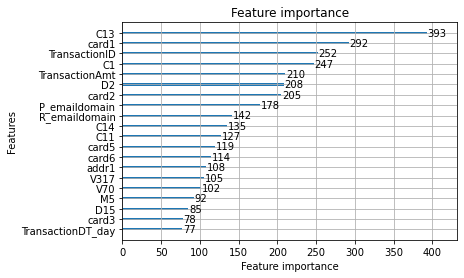

In [995]:
lightgbm.plot_importance(lgb,max_num_features=20)

In [1022]:
# Метрика ниже, дисперсия больше. Из новых признаков в топе только TransactionDT_day

Задание 2: сделать конкатенацию признаков
* card1 + card2;
* card1 + card2 + card_3 + card_5;
* card1 + card2 + card_3 + card_5 + addr1 + addr2

Рассматривать их как категориальных признаки.

In [997]:
x['card12']=x.card1+x.card2
x['card1235']=x.card1+x.card2+x.card3+x.card5
x['card1235_addr12']=x['card1235']+x.addr1+x.addr2

x['card12']=x['card12'].astype('category')
x['card1235']=x['card1235'].astype('category')
x['card1235_addr12']=x['card1235_addr12'].astype('category')

In [998]:

scores=cross_val_score(lgb,x, y, scoring='roc_auc', cv=cv)
print(f'mean: {round(scores.mean(),6)}, std: {round(scores.std(),6)}')

mean: 0.929507, std: 0.00517


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

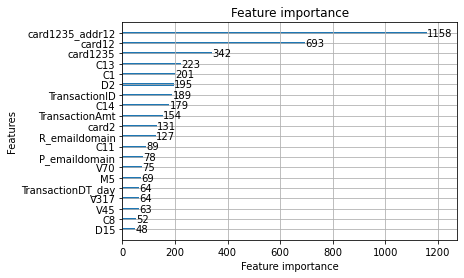

In [999]:
lgb.fit(x,y)
lightgbm.plot_importance(lgb,max_num_features=20)

In [1023]:
# Метрика увеличилась на 2%, отклонение - в два раза, что не очень хорошо.
# Новые признаки по важности заняли топ-3

Задание 3: Сделать FrequencyEncoder для признаков card1 - card6, addr1, addr2

In [1001]:
def freq_enc(x,features):
    
    for feature in features:
        freq_encoder = x[feature].value_counts(normalize=True)
        x[feature +'_enc'] = x[feature].map(freq_encoder)
    return x
   

In [1002]:
features=['card1','card2','card3','card4','card5','card6','addr1','addr2']

In [1003]:
x=freq_enc(x,features)

In [1004]:
scores=cross_val_score(lgb,x, y, scoring='roc_auc', cv=cv)
print(f'mean: {round(scores.mean(),6)}, std: {round(scores.std(),6)}')

mean: 0.930208, std: 0.004971


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

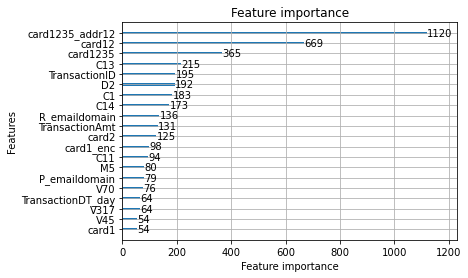

In [1005]:
lgb.fit(x,y)
lightgbm.plot_importance(lgb,max_num_features=20)

In [1024]:
# Метрика немного увеличилась, дисперсия снизилась, что в целом хорошо.
# card1_enc вошел в топ

Задание 4: Создать признаки на основе отношения: TransactionAmt к вычисленной статистике. Статистика - среднее значение / стандартное отклонение TransactionAmt, сгруппированное по card1 - card6, addr1, addr2, и по признакам, созданным в задании 2.

In [1007]:
def make_stat(x,base_feature, features):
    
    for feature in features:
        name_=base_feature+'_'+feature       
        temp=x[[base_feature,feature]].groupby(feature).agg(['mean','std'])
        temp[name_]=temp[base_feature]['mean']/temp[base_feature]['std']
        x=x.merge(temp[[name_]].droplevel(1,axis=1),on=feature,right_index=True, how='left')
        x[name_]=x[base_feature]/x[name_]
    return x

In [1008]:
features.extend(['card12','card1235','card1235_addr12'])

In [1009]:
x=make_stat(x,'TransactionAmt', features)

In [1010]:

scores=cross_val_score(lgb,x, y, scoring='roc_auc', cv=cv)
print(f'mean: {round(scores.mean(),6)}, std: {round(scores.std(),6)}')


mean: 0.93046, std: 0.005272


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

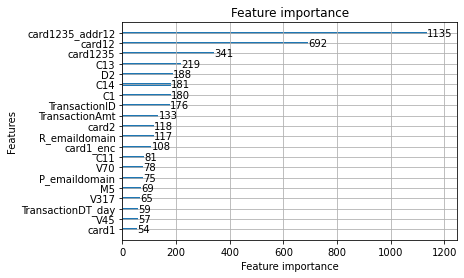

In [1011]:
lgb.fit(x,y)
lightgbm.plot_importance(lgb,max_num_features=20)

In [1025]:
# Существенных изменений нет

Задание 5: Создать признаки на основе отношения: D15 к вычисленной статистике. Статистика - среднее значение / стандартное отклонение D15, сгруппированное по card1 - card6, addr1, addr2, и по признакам, созданным в задании 2.

In [1012]:
x=make_stat(x,'D15', features)

In [1013]:
scores=cross_val_score(lgb,x, y, scoring='roc_auc', cv=cv)
print(f'mean: {round(scores.mean(),6)}, std: {round(scores.std(),6)}')

mean: 0.931004, std: 0.004953


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

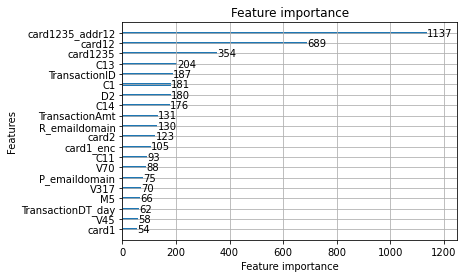

In [1014]:
lgb.fit(x,y)
lightgbm.plot_importance(lgb,max_num_features=20)

In [ ]:
# Минимальный прирост в качестве

Задание 6: выделить дробную часть и целую часть признака TransactionAmt в два отдельных признака. После создать отдельных признак - логарифм от TransactionAmt

In [1015]:
x['TransactionAmt_fract']=x.TransactionAmt.apply(lambda x:x%1)
x['TransactionAmt_whole']=x.TransactionAmt.apply(int)
x['TransactionAmt_log']=x.TransactionAmt.apply(np.log)

In [1016]:
scores=cross_val_score(lgb,x, y, scoring='roc_auc', cv=cv)
print(f'mean: {round(scores.mean(),6)}, std: {round(scores.std(),6)}')

mean: 0.930964, std: 0.004981


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

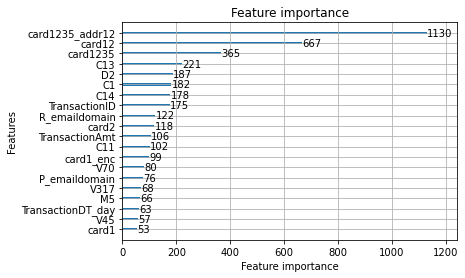

In [1017]:
lgb.fit(x,y)
lightgbm.plot_importance(lgb,max_num_features=20)

In [1026]:
# Существенных изменений нет

Задание 7 (опция): выполнить предварительную подготовку / очистку признаков P_emaildomain и R_emaildomain (что и как делать - остается на ваше усмотрение) и сделать Frequency Encoding для очищенных признаков.

In [1030]:
x_t=x.copy()

In [1031]:
x_t[['P_emaildomain','R_emaildomain']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   P_emaildomain  151560 non-null  object
 1   R_emaildomain  60300 non-null   object
dtypes: object(2)
memory usage: 2.7+ MB


In [1032]:
n= Counter(x_t[['P_emaildomain','R_emaildomain']].values.flatten())

In [1033]:
# заполняем случайными прапорционально вероятности
p=np.array(list(n.values())[1:])/sum(list(n.values())[1:])
values_=list(n.keys())[1:]
size_=x_t[(x_t.P_emaildomain.isnull()) & (x.R_emaildomain.isnull())].shape[0]
l1=np.random.choice(values_,size=size_,p=p)
l2=np.random.choice(values_,size=size_,p=p)
index_=x_t.loc[(x.P_emaildomain.isnull()) & (x.R_emaildomain.isnull())].index
x_t.loc[index_,'R_emaildomain' ]=l1
x_t.loc[index_,'P_emaildomain' ]=l2

In [1034]:
# заполняем такими же из соседней колонки
x_t.R_emaildomain.fillna(x_t.P_emaildomain, inplace=True)
x_t.P_emaildomain=x_t.P_emaildomain.astype('object').fillna(x_t.R_emaildomain).astype('category')

In [1035]:
x_t[['P_emaildomain','R_emaildomain']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   P_emaildomain  180000 non-null  category
 1   R_emaildomain  180000 non-null  object  
dtypes: category(1), object(1)
memory usage: 1.5+ MB


In [1036]:
features=['P_emaildomain','R_emaildomain']
x_t=freq_enc(x_t,features)

In [1037]:
x_t[['P_emaildomain_enc','R_emaildomain_enc']]

,P_emaildomain_enc,R_emaildomain_enc
0,0.186450,0.099989
1,0.441244,0.442983
2,0.009917,0.010111
3,0.186450,0.183506
4,0.441244,0.442983
...,...,...
179995,0.441244,0.442983
179996,0.186450,0.183506
179997,0.441244,0.442983
179998,0.186450,0.442983
